# Importações e configurações

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

from tpot import TPOTClassifier

import matplotlib.pyplot as plt

import xgboost as xgb

from joblib import dump

import warnings

c:\Users\henri\OneDrive\Área de Trabalho\Programação\Projetos e Atividades\Graduação BSI\4º período\Engenharia de Software\Conecta IFPE\conecta-ifpe-rank-IA\virtualenv\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
warnings.filterwarnings('ignore')

In [3]:
RANDOM_SEED = 42

# Carregando os dados

In [4]:
df = pd.read_excel("../data/cleaned_datas/cleaned_data.xlsx")

In [5]:
df

,Alimentação no ambiente escolar,Aluno contemplado com bolsa?,Como você acessa os serviços de saúde_Plano de saúde (Privado),Como você acessa os serviços de saúde_Público e privado,Como você acessa os serviços de saúde_Sistema Público de Saúde,Como você acessa/acessou à educação básica (Ensino Médio)_Bolsista de escola privada,Como você acessa/acessou à educação básica (Ensino Médio)_Escola privada,Como você acessa/acessou à educação básica (Ensino Médio)_Escola pública,Como você acessa/acessou à educação básica (Ensino Médio)_Pública e privada,Como você acessou à educação básica (Ensino Fundamental)_Bolsista de escola privada,...,Sexo_Feminino,Sexo_Masculino,Turno_Integral,Turno_Manhã,Turno_Noite,Turno_Tarde,Você possui filhos entre 0 e 6 anos,Você possui filhos maiores que 6 anos,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?"
0,60.0,False,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,0,0,False,False
1,50.0,False,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,0,0,True,True
2,0.0,False,False,False,True,False,False,True,False,False,...,True,False,True,False,False,False,0,0,False,False
3,0.0,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,True,0,2,False,False
4,0.0,False,False,False,True,False,False,True,False,False,...,False,True,True,False,False,False,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24189,45.0,True,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,0,0,False,False
24190,0.0,True,False,False,True,False,False,True,False,False,...,True,False,False,False,False,True,0,0,False,True
24191,10.0,True,False,False,True,False,False,True,False,False,...,True,False,False,False,True,False,0,2,True,True
24192,40.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,0,0,True,True


# Pré-processamento dos dados

## Dropando a coluna Relatos de vida (TEMPORÁRIO)

In [6]:
df = df.drop(columns=["Relato de vida"])

## Transformando float64 em float

In [7]:
df.dtypes

Alimentação no ambiente escolar                                      float64
Aluno contemplado com bolsa?                                            bool
Como você acessa os serviços de saúde_Plano de saúde (Privado)          bool
Como você acessa os serviços de saúde_Público e privado                 bool
Como você acessa os serviços de saúde_Sistema Público de Saúde          bool
                                                                      ...   
Turno_Tarde                                                             bool
Você possui filhos entre 0 e 6 anos                                    int64
Você possui filhos maiores que 6 anos                                  int64
Você é chefe de família ou responsável pela própria subsistência?       bool
É cotista por renda inferior a 1,5 salário mínimo?                      bool
Length: 72, dtype: object

## Analisando correlação entre features

Por enquanto, vou manter sem o drop destas colunas correlacionadas.

In [8]:
"""
def get_highly_correlated_features(correlation_matrix, threshold):
  correlated_pairs = []
  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i, j]) > threshold:
        pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
        coefficient = correlation_matrix.iloc[i, j]
        correlated_pairs.append((pair, coefficient))
  return sorted(correlated_pairs, key= lambda pair: pair[1], reverse=True)
"""

'\ndef get_highly_correlated_features(correlation_matrix, threshold):\n  correlated_pairs = []\n  for i in range(len(correlation_matrix.columns)):\n    for j in range(i):\n      if abs(correlation_matrix.iloc[i, j]) > threshold:\n        pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])\n        coefficient = correlation_matrix.iloc[i, j]\n        correlated_pairs.append((pair, coefficient))\n  return sorted(correlated_pairs, key= lambda pair: pair[1], reverse=True)\n'

In [9]:
"""
corr_matrix = df.corr().abs()
correlation_list = get_highly_correlated_features(corr_matrix, 0.95)
"""

'\ncorr_matrix = df.corr().abs()\ncorrelation_list = get_highly_correlated_features(corr_matrix, 0.95)\n'

In [10]:
#correlation_list[:10]

In [11]:
"""
f2drop = []
for feature_pair, _ in correlation_list:
  if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:
    f2drop.append(feature_pair[1])
"""

'\nf2drop = []\nfor feature_pair, _ in correlation_list:\n  if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:\n    f2drop.append(feature_pair[1])\n'

In [12]:
#f2drop

In [13]:
#df = df.drop(f2drop, axis='columns')

## Lidando com valores nulos

In [14]:
#imputer = KNNImputer(n_neighbors=3)

In [15]:
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## Dividindo dados nos conjuntos de treino, validação e teste

In [16]:
labels = df[['Aluno contemplado com bolsa?']].copy()
df = df.drop(columns=['Aluno contemplado com bolsa?'])

In [17]:
#def convert_label(value):
#    return False if value <= 0.5 else True

In [18]:
labels

,Aluno contemplado com bolsa?
0,False
1,False
2,False
3,False
4,False
...,...
24189,True
24190,True
24191,True
24192,True


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.1)#, random_state=RANDOM_SEED)

## Normalizando os dados numéricos

In [20]:
#numeric_columns = df.select_dtypes(include=['number']).columns

X_train_unormalized = X_train

scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Inteligências artificiais

## Funções de métricas

In [21]:
def get_overall_metrics(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  acc = (tp+tn)/(tp+tn+fp+fn)
  tpr = tp/(tp+fn)
  fpr = fp/(fp+tn)
  precision = tp/(tp+fp)
  f1 = (2*tpr*precision)/(tpr+precision)
  return {'acc':acc,'tpr':tpr,'fpr':fpr,'precision':precision,'f1-score':f1}

In [22]:
def transform_prob_in_pred(probs):
    predict_list = list()
    for prob in probs:
        if prob[0] > prob[1]:
            predict_list.append(False)
        elif prob[0] < prob[1]:
            predict_list.append(True)

    predict_array = np.array(predict_list)
    return predict_array

## Modelos de aprendizagem de máquina clássicos

### Naive bayesian

#### Treinamento

In [23]:
model = GaussianNB()

In [24]:
model.fit(X_train, y_train)

GaussianNB()

#### Teste

In [25]:
y_pred_proba = model.predict_proba(X_test)

In [26]:
y_pred = model.predict(X_test)

In [27]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8475206611570248
Precision: 0.8481565442896551
Recall: 0.8475206611570248


In [29]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8475206611570248,
 'tpr': 0.9378172588832487,
 'fpr': 0.32109004739336494,
 'precision': 0.8450543167524299,
 'f1-score': 0.8890225563909774}

### Logistic regression

#### Treinamento

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

#### Teste

In [32]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [33]:
y_pred_proba = model.predict_proba(X_test)

In [34]:
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8714876033057851
Precision: 0.8872523260990408
Recall: 0.8714876033057851


In [36]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8714876033057851,
 'tpr': 0.9911167512690355,
 'fpr': 0.3518957345971564,
 'precision': 0.8402366863905325,
 'f1-score': 0.9094614264919941}

### Random Forest

#### Treinamento

In [37]:
model = RandomForestClassifier(n_estimators=100)#, random_state=RANDOM_SEED)

In [38]:
model.fit(X_train, y_train)

RandomForestClassifier()

#### Teste

In [39]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [40]:
y_pred_proba = model.predict_proba(X_test)

In [41]:
y_pred = model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8710743801652893
Precision: 0.876980464900314
Recall: 0.8710743801652893


In [43]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8710743801652893,
 'tpr': 0.9682741116751269,
 'fpr': 0.3104265402843602,
 'precision': 0.8534675615212528,
 'f1-score': 0.9072532699167657}

### Gradient Boost Machine

#### Treinamento

In [78]:
model = GradientBoostingClassifier(
    n_estimators= 75,
    learning_rate= 0.175,
    )#, random_state=RANDOM_SEED)

In [79]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.175, n_estimators=75)

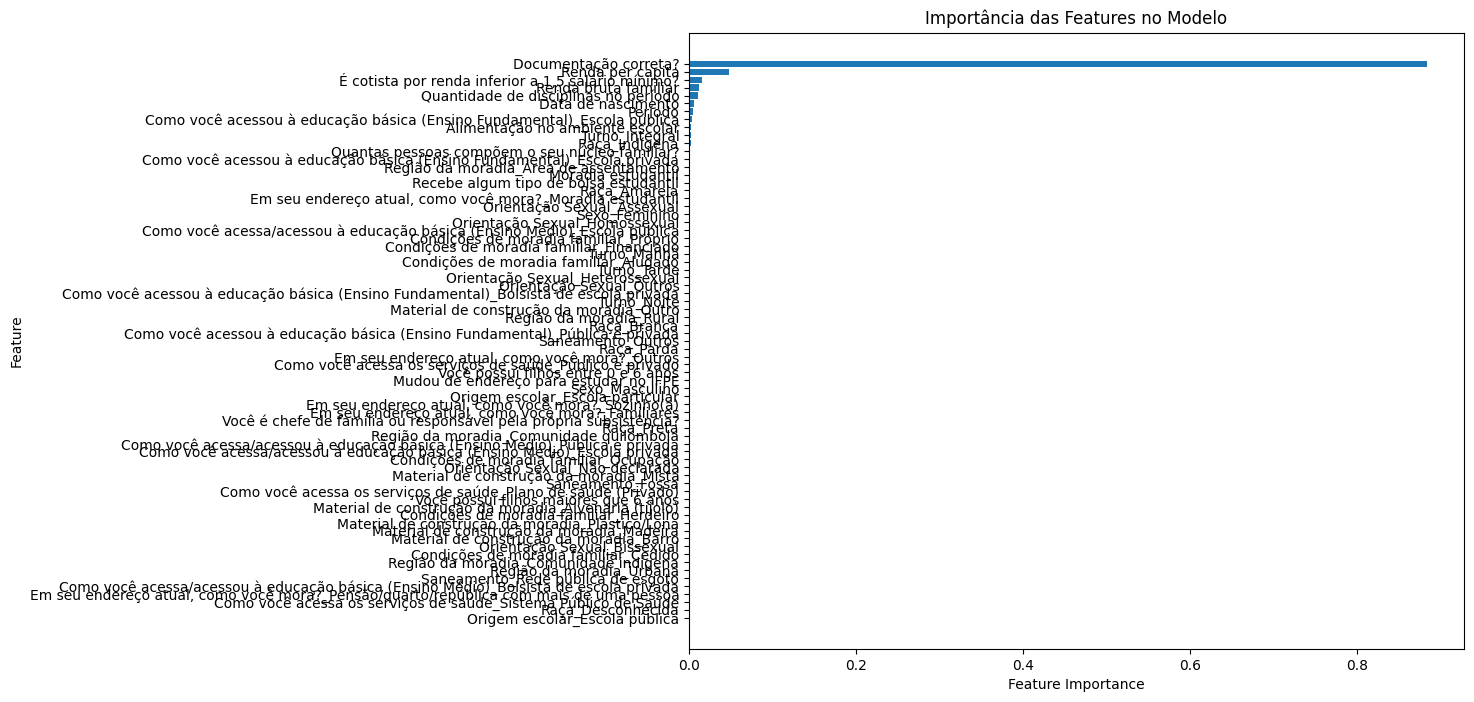

In [80]:
importance = model.feature_importances_

# Converter em DataFrame para facilitar a visualização
importance_df = pd.DataFrame({
    'Feature': X_train_unormalized.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo")
plt.gca().invert_yaxis()  # Inverter a ordem para que a feature mais importante apareça no topo
plt.show()

#### Teste

In [81]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [82]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.19200293, 0.80799707],
       [0.13937397, 0.86062603],
       [0.99586838, 0.00413162],
       ...,
       [0.16580237, 0.83419763],
       [0.99736513, 0.00263487],
       [0.16891958, 0.83108042]])

In [83]:
y_pred = model.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8706611570247934
Precision: 0.8862803327333449
Recall: 0.8706611570247934


In [85]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8706611570247934,
 'tpr': 0.9904822335025381,
 'fpr': 0.35308056872037913,
 'precision': 0.8396987627756859,
 'f1-score': 0.9088791848617177}

### Support Vector Machines

#### Treinamento

In [52]:
model = SVC(probability=True)#, random_state=RANDOM_SEED)

In [53]:
model.fit(X_train, y_train)

SVC(probability=True)

#### Teste

In [54]:
y_pred_proba = model.predict_proba(X_test)

In [55]:
y_pred = model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8632231404958678
Precision: 0.8811062449714422
Recall: 0.8632231404958678


In [57]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8632231404958678,
 'tpr': 0.9911167512690355,
 'fpr': 0.3755924170616114,
 'precision': 0.8312932410856839,
 'f1-score': 0.9041968162083936}

### Cross Batch Model (XBM)

#### Treinamento

In [58]:
model = XGBClassifier(
    objective='binary:logistic',  # Problema de classificação binária
    booster='gbtree',             # Tipo de booster
    n_estimators=100,             # Número de árvores
    learning_rate=0.178,            # Taxa de aprendizado
    max_depth=6,                  # Profundidade máxima das árvores
    min_child_weight=10,           # Peso mínimo da criança
    gamma=0.5,                      # Redução mínima na função de perda para fazer uma divisão
    subsample=0.8,                # Fração de amostras usadas para ajustar cada árvore
    colsample_bytree=0.8,         # Fração de características usadas para cada árvore            
    alpha=1,                      # Regularização L1
    scale_pos_weight=1           # Peso para a classe positiva
    #random_state=RANDOM_SEED               # Semente para reprodutibilidade
    #n_jobs=6
)

In [59]:
model.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.178, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

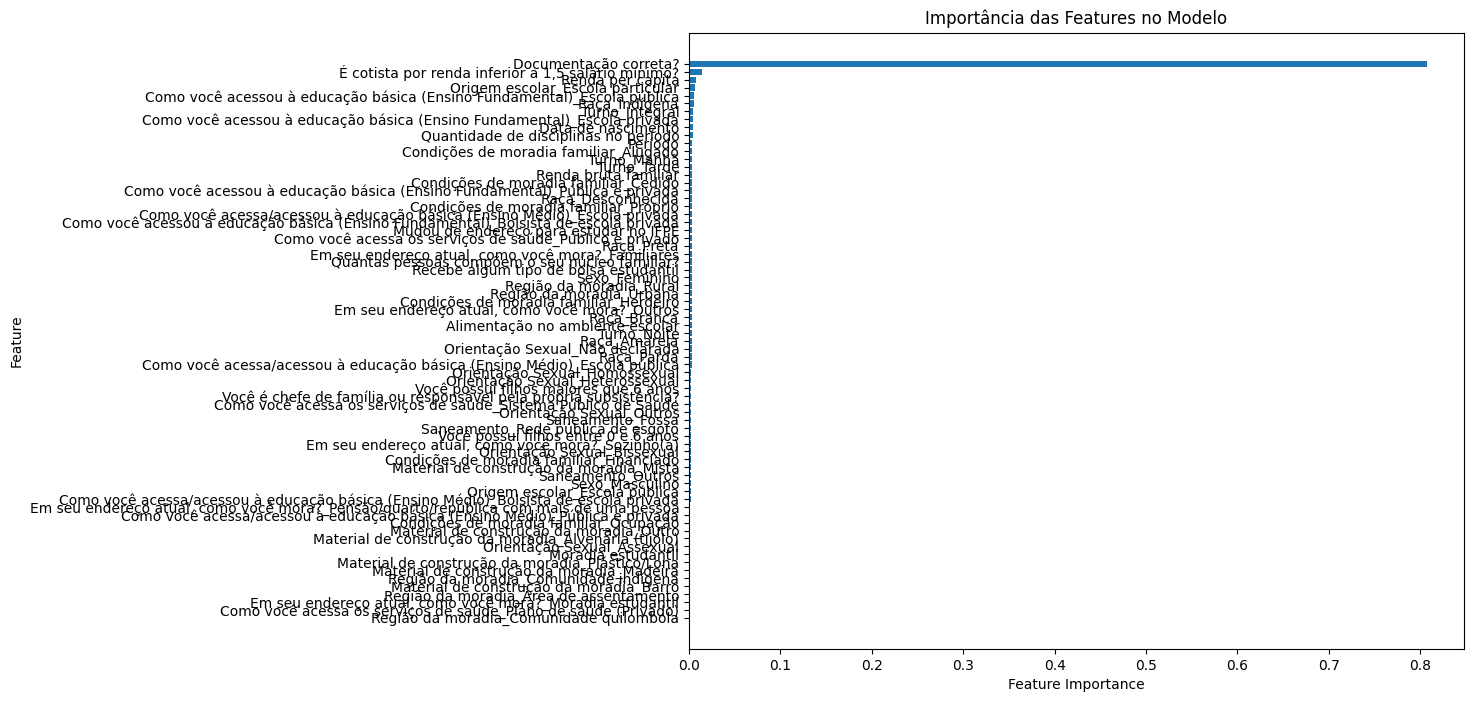

In [60]:
importance = model.feature_importances_

# Converter em DataFrame para facilitar a visualização
importance_df = pd.DataFrame({
    'Feature': X_train_unormalized.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo")
plt.gca().invert_yaxis()  # Inverter a ordem para que a feature mais importante apareça no topo
plt.show()

#### Teste

In [61]:
y_pred_proba = model.predict_proba(X_test)

In [62]:
y_pred = model.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8702479338842976
Precision: 0.8787928178294238
Recall: 0.8702479338842976


In [64]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8702479338842976,
 'tpr': 0.975253807106599,
 'fpr': 0.32582938388625593,
 'precision': 0.8482339955849889,
 'f1-score': 0.9073199527744982}

## Modelos de aprendizagem profunda

Configurações opcionais:

In [65]:
#labels = tf.keras.utils.to_categorical(labels, num_classes=2)

In [66]:
#labels = to_categorical(labels, num_classes=2)

### Rede neural simples (MLP)

#### Treinamento

In [67]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Camada de entrada com 1536 neurônios
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [68]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [70]:
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/300


545/545 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.6130 - loss: 0.6713 - val_accuracy: 0.7809 - val_loss: 0.5263
Epoch 2/300
545/545 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7496 - loss: 0.5455 - val_accuracy: 0.8521 - val_loss: 0.4100
Epoch 3/300
545/545 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8074 - loss: 0.4678 - val_accuracy: 0.8615 - val_loss: 0.3645
Epoch 4/300
545/545 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.8296 - loss: 0.4295 - val_accuracy: 0.8631 - val_loss: 0.3534
Epoch 5/300
545/545 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.8381 - loss: 0.4088 - val_accuracy: 0.8625 - val_loss: 0.3478
Epoch 6/300
545/545 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.8436 - loss: 0.3956 - val_accuracy: 0.8629 - val_loss: 0.3455
Epoch 7/300
545/545 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8456 - loss: 0.3889 - val_accuracy: 0.8634 - val_loss: 0.3441
Epoch 8/300
545/545 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.8518 - loss: 0.3744 - val_

#### Teste

In [71]:
y_pred_proba = model.predict(X_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step


In [72]:
y_pred = transform_prob_in_pred(y_pred_proba)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.871900826446281
Precision: 0.8890037756911189
Recall: 0.871900826446281


In [74]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.871900826446281,
 'tpr': 0.9936548223350253,
 'fpr': 0.35545023696682465,
 'precision': 0.8392282958199357,
 'f1-score': 0.9099360836722835}

## Aprendizagem de máquina automática (AutoML)

## Tpot

In [75]:
#tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20)
#tpot.fit(X_train, y_train)

In [76]:
#print(tpot.score(X_test, y_test))

# Ordenação do dataframe

In [77]:
y_pred_proba = model.predict_proba(df)

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [ ]:
df['Nível de necessidade'] = y_pred_proba[:, 1]

In [ ]:
df_result = df.sort_values(by='Nível de necessidade', ascending=False)

In [ ]:
df_result.reset_index(drop=True, inplace=True)

In [ ]:
df_result

,Abastecimento de água_Fonte/água não tratada,Abastecimento de água_Outros,Abastecimento de água_Poço/água não tratada,Abastecimento de água_Rede geral/água tratada,Alimentação no ambiente escolar,Auxílio digital_CHIP da RNP,Auxílio digital_Não foi contemplado,Auxílio digital_Valor para dispositivo,Auxílio digital_Valor para plano de dados,Auxílio digital_Valor para plano de dados e dipositivo,...,Sexo_Masculino,Turno_Integral,Turno_Manhã,Turno_Noite,Turno_Tarde,Você possui filhos entre 0 e 6 anos,Você possui filhos maiores que 6 anos,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?",Nível de necessidade
0,False,False,False,True,10.0,False,True,False,False,False,...,True,False,True,False,False,0,0,False,True,0.946738
1,False,False,False,True,10.0,False,True,False,False,False,...,True,False,True,False,False,0,0,False,True,0.942912
2,False,False,False,True,50.0,False,True,False,False,False,...,True,False,True,False,False,0,0,False,True,0.940457
3,False,False,False,True,90.0,False,True,False,False,False,...,False,False,False,False,True,0,0,True,True,0.926667
4,False,False,False,True,0.0,False,True,False,False,False,...,True,True,False,False,False,0,0,False,True,0.925987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,False,False,True,False,0.0,False,True,False,False,False,...,True,False,False,True,False,0,0,True,False,0.212941
17697,True,False,False,False,0.0,False,True,False,False,False,...,False,False,False,False,True,0,0,False,False,0.211544
17698,False,False,True,False,200.0,False,True,False,False,False,...,False,True,False,False,False,0,0,False,False,0.209711
17699,False,False,False,True,0.0,False,True,False,False,False,...,False,False,False,True,False,0,0,True,False,0.209091


In [ ]:
#df.to_excel('../data/cleaned_datas/sorted_cleaned_data.xlsx', index=False)

In [ ]:
df

,Abastecimento de água_Fonte/água não tratada,Abastecimento de água_Outros,Abastecimento de água_Poço/água não tratada,Abastecimento de água_Rede geral/água tratada,Alimentação no ambiente escolar,Auxílio digital_CHIP da RNP,Auxílio digital_Não foi contemplado,Auxílio digital_Valor para dispositivo,Auxílio digital_Valor para plano de dados,Auxílio digital_Valor para plano de dados e dipositivo,...,Sexo_Feminino,Sexo_Masculino,Turno_Integral,Turno_Manhã,Turno_Noite,Turno_Tarde,Você possui filhos entre 0 e 6 anos,Você possui filhos maiores que 6 anos,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?"
0,False,False,False,True,0.0,False,True,False,False,False,...,True,False,False,False,True,False,0,0,False,True
1,False,False,False,True,0.0,False,True,False,False,False,...,False,True,False,True,False,False,0,0,False,True
2,False,False,False,True,0.0,False,True,False,False,False,...,True,False,False,True,False,False,0,0,False,True
3,False,False,True,False,50.0,False,True,False,False,False,...,True,False,False,False,True,False,0,0,False,True
4,False,False,False,True,50.0,False,False,False,False,True,...,True,False,False,False,False,True,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22090,False,False,False,True,45.0,False,True,False,False,False,...,False,True,False,False,False,True,0,0,False,False
22091,False,False,False,True,0.0,False,True,False,False,False,...,True,False,False,False,False,True,0,0,False,True
22092,False,True,False,False,10.0,False,True,False,False,False,...,True,False,False,False,True,False,0,2,True,True
22093,False,False,False,True,40.0,False,False,False,True,False,...,False,True,False,False,True,False,0,0,True,True


In [86]:
dump(model, f'../models/GBM_{len(df.columns)}c_a87.joblib')

['../models/GBM_80c_a87.joblib']

In [87]:
dump(scaler, f'../models/scalers/std_scaler_GBM_{len(df.columns)}c_a87.pkl')

['../models/scalers/std_scaler_GBM_80c_a87.pkl']